In [4]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
We use the following representation to collect the dataset
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class

.Age(numerical)
age in years
2.Blood Pressure(numerical)
bp in mm/Hg
3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal)
al - (0,1,2,3,4,5)
5.Sugar(nominal)
su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal)
rbc - (normal,abnormal)
7.Pus Cell (nominal)
pc - (normal,abnormal)
8.Pus Cell clumps(nominal)
pcc - (present,notpresent)
9.Bacteria(nominal)
ba - (present,notpresent)
10.Blood Glucose Random(numerical)
bgr in mgs/dl
11.Blood Urea(numerical)
bu in mgs/dl
12.Serum Creatinine(numerical)
sc in mgs/dl
13.Sodium(numerical)
sod in mEq/L
14.Potassium(numerical)
pot in mEq/L
15.Hemoglobin(numerical)
hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical)
wc in cells/cumm
18.Red Blood Cell Count(numerical)
rc in millions/cmm
19.Hypertension(nominal)
htn - (yes,no)
20.Diabetes Mellitus(nominal)
dm - (yes,no)
21.Coronary Artery Disease(nominal)
cad - (yes,no)
22.Appetite(nominal)
appet - (good,poor)
23.Pedal Edema(nominal)
pe - (yes,no)
24.Anemia(nominal)
ane - (yes,no)
25.Class (nominal)
class - (ckd,notckd)

SyntaxError: invalid syntax (455394086.py, line 1)

In [5]:
df=pd.read_csv('kidney_disease.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['classification'].value_counts()

In [ ]:
pd.set_option('display.max_columns', 30)

In [ ]:
df.head()

In [ ]:
df.isna().sum()/len(df)*100

In [ ]:
df.info()

In [ ]:
#check if datatype is same as given in description - dataset that has ammbiguity

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'])

In [ ]:
df['pcv'].mask((df['pcv'].eq("	?")), inplace=True)

In [ ]:
df['pcv'] = pd.to_numeric(df['pcv'])

In [ ]:
#to iddentify where ambiguity s there

In [10]:
for i in list(df.select_dtypes(include=["object"]).columns):
    print(i,'..........', df[i].unique() )

rbc .......... [nan 'normal' 'abnormal']
pc .......... ['normal' 'abnormal' nan]
pcc .......... ['notpresent' 'present' nan]
ba .......... ['notpresent' 'present' nan]
pcv .......... ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc .......... ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '

In [ ]:
df['classification'] = df['classification'].replace("ckd\t",'ckd')

In [6]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [7]:
df['classification'] = df['classification'].replace({'ckd':1, 'notckd':0})

In [8]:
df['classification'].value_counts()

1        248
0        150
ckd\t      2
Name: classification, dtype: int64

In [9]:
df['classification'] = df['classification'].replace("ckd\t",1)

In [11]:
df['cad'] = df['cad'].replace("\tno",'no')

In [12]:
df['dm'] = df['dm'].replace({"\tno":'no',' yes':'yes', '\tyes':'yes' })

In [13]:
df['dm'].value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [ ]:
#next param is rc,  here we see \t, but that shud not be replaced with 0, as there cannot be person with 0 white blood

In [14]:
df['rc'] = df['rc'].replace("\t?",np.nan)

In [15]:
df['rc'] = pd.to_numeric(df['rc'])

In [16]:
df['wc'] = df['wc'].replace({"\t8400":'8400',' \t6200':'6200', '\t?':np.nan})

In [17]:
df['wc'] = pd.to_numeric(df['wc'])

In [18]:
#kd_data['pcv'].str.strip().replace('?','').value_counts()

In [20]:
df['pcv'] = df['pcv'].apply(lambda x: str(x).strip().replace('?',''))

In [22]:
df['pcv'].value_counts()

nan    70
52     21
41     21
48     19
44     19
40     16
43     15
42     13
45     13
36     12
33     12
28     12
50     12
32     12
37     11
34     11
46      9
30      9
29      9
35      9
31      8
24      7
39      7
26      6
38      5
53      4
51      4
49      4
47      4
54      4
25      3
22      3
27      3
19      2
23      2
15      1
21      1
17      1
20      1
18      1
9       1
        1
16      1
14      1
Name: pcv, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              294 non-null    flo

In [24]:
df['pcv'] = pd.to_numeric(df['pcv'])

ValueError: Unable to parse string "nan" at position 13

In [26]:
df['pcv'] = df['pcv'].replace("nan",np.nan)

In [27]:
df['pcv'] = pd.to_numeric(df['pcv'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [29]:
#so till now only datatype ambiguity is removed
#now will start with filling missing values

In [30]:
df.isna().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [37]:
for i in list(df.select_dtypes(include=["object"]).columns):
    df[i] = df[i].fillna(df[i].mode()[0])

In [36]:
df.isna().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc                0.00
pc                 0.00
pcc                0.00
ba                 0.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.00
dm                 0.00
cad                0.00
appet              0.00
pe                 0.00
ane                0.00
classification     0.00
dtype: float64

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

<AxesSubplot:>

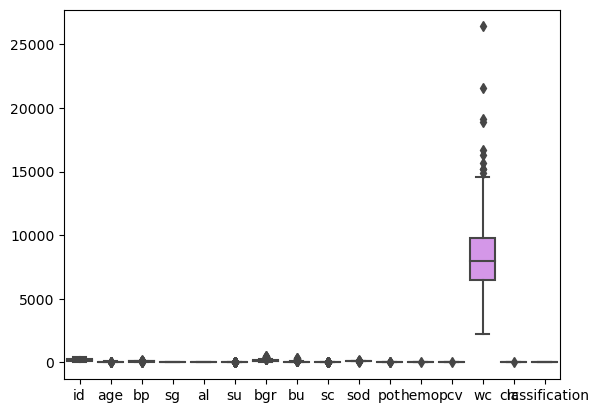

In [38]:
sns.boxplot(data=df)


In [43]:
def boxplot(cols):
    sns.boxplot(y=df[cols])
    plt.show()

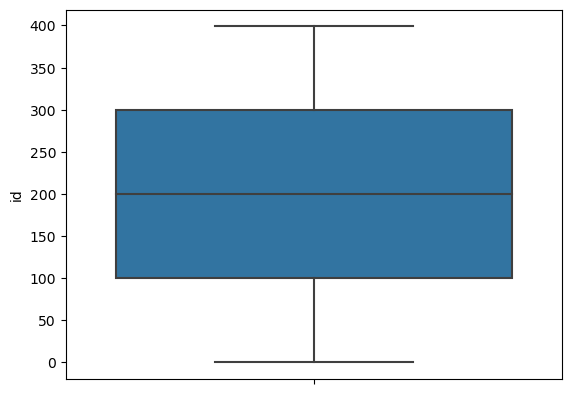

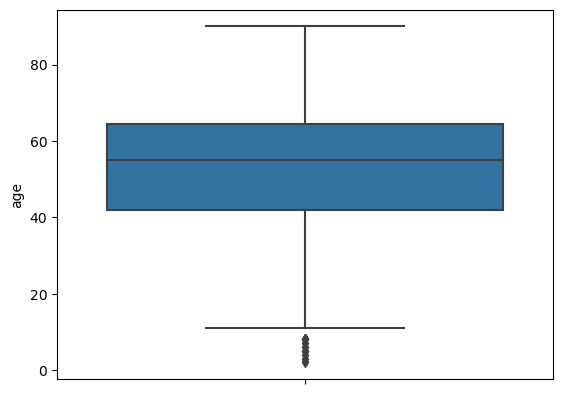

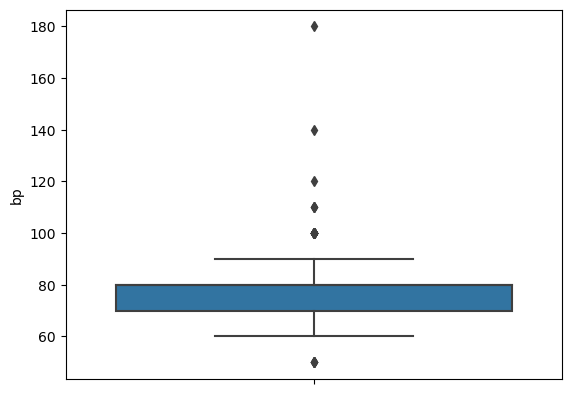

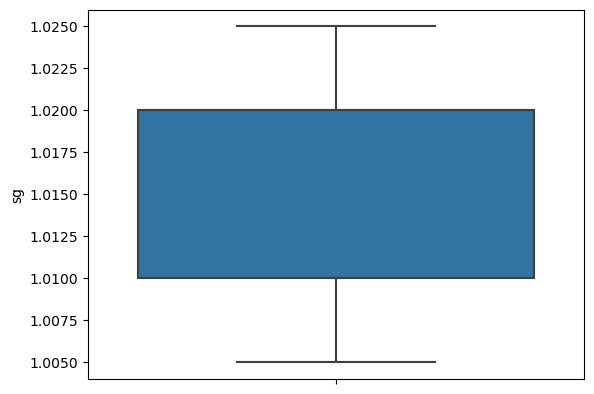

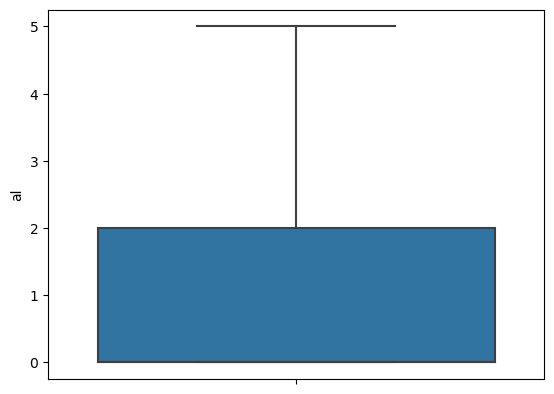

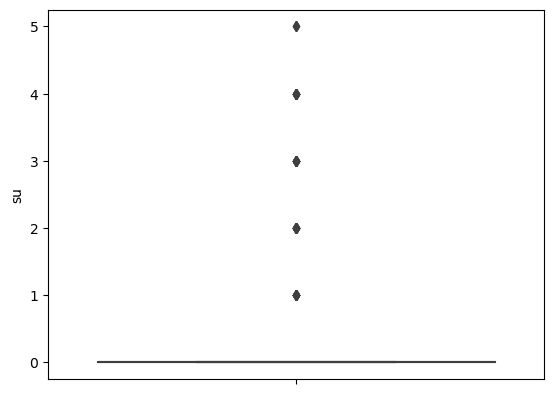

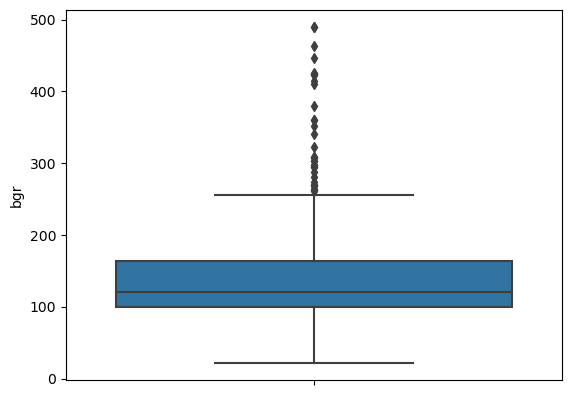

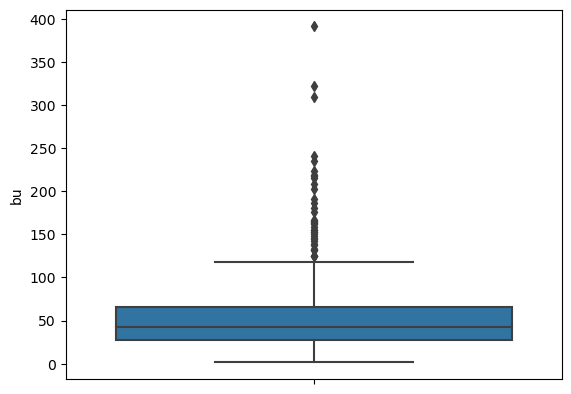

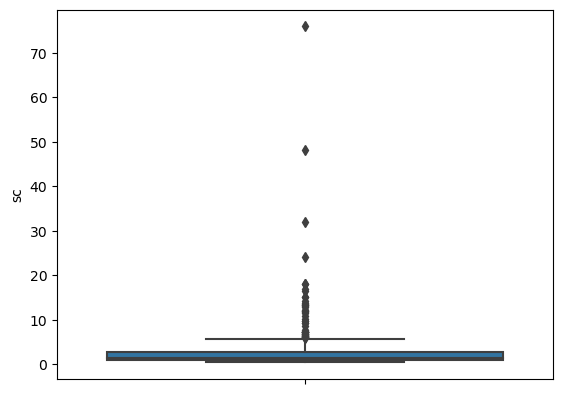

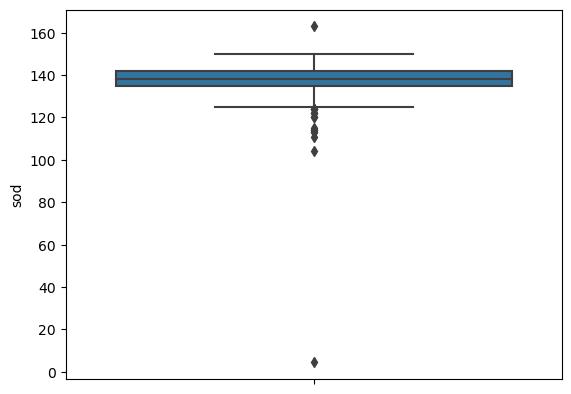

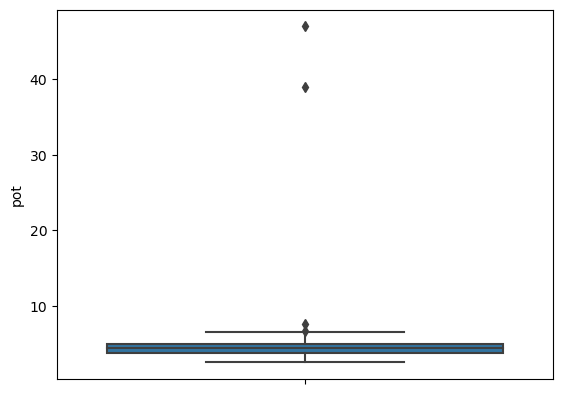

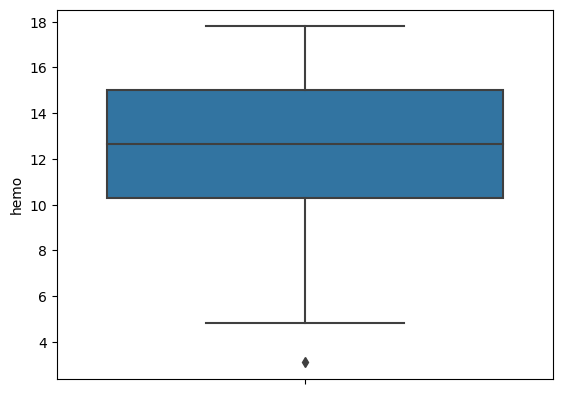

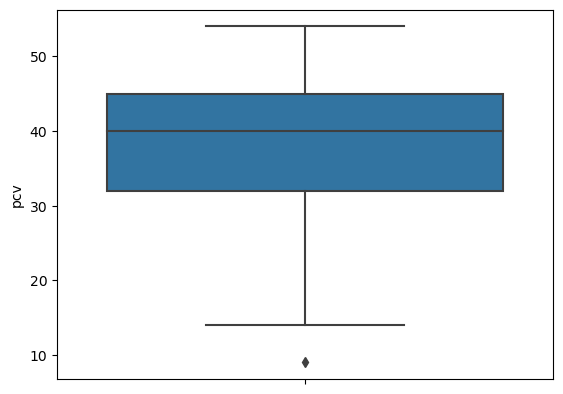

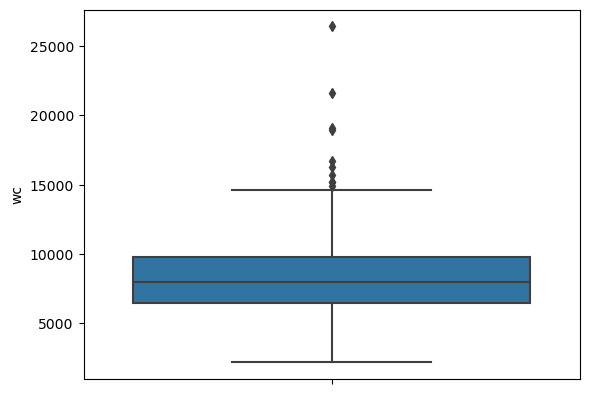

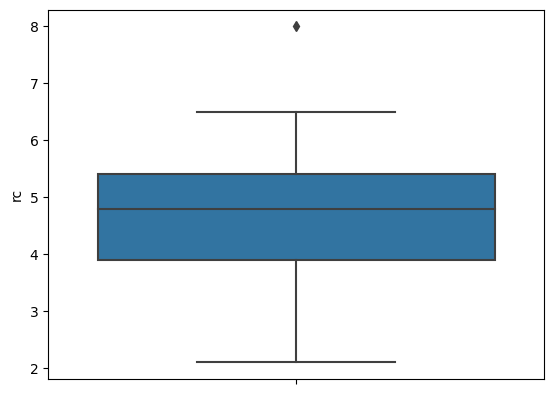

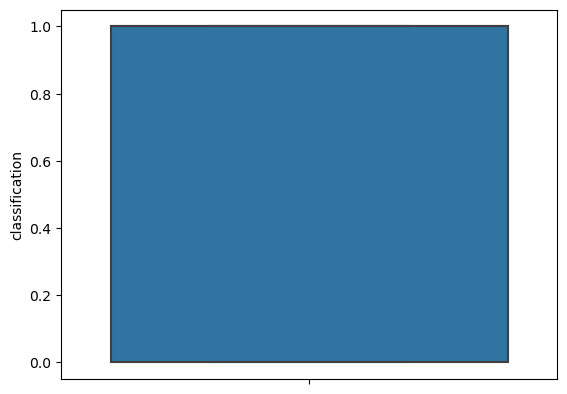

In [44]:
for i in list(df.select_dtypes(exclude=["object"]).columns):
    boxplot(i)


In [56]:
def outlier_detect(cols):
    res = {}
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    iqr = Q3-Q1
    upper_fence= Q3+1.5*iqr
    lower_fence= Q1-1.5*iqr
#     print('upper fence \n', upper_fence)
#     print('lowe fence \n', lower_fence)
    res['upper'] = upper_fence[cols]
    res['lower'] = lower_fence[cols]
    return res

In [62]:
#
out=[]
for i in list(df.select_dtypes(exclude=["object"]).columns):
    res = outlier_detect(i)
    for x in df[i]:
        if x > res['upper'] or x < res['lower']:
            out.append(x)
        else:
            continue
    if len(out) > 0:
        df[i] = df[i].fillna(df[i].median())
        out.clear()
    else:
        df[i] = df[i].fillna(df[i].mean())
        out.clear()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [ ]:
#hence all missing values has been removed

In [ ]:
#now encoding part of catgeory

In [65]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [66]:
df = pd.get_dummies(df, columns = list(df.select_dtypes(include=object).columns), drop_first=True)
df.shape

(400, 26)

In [67]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,1,1,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,1,1,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,1,1,0,0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,1,0,1,0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,1,1,0,0,0,0,0,0,0,0


In [69]:
df.drop(['id'], axis=1)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,...,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,...,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,...,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,...,1,1,0,0,0,0,0,0,0,0


In [70]:
x = df.drop(['classification'], axis=1)
y = df['classification']


In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=17)

In [72]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [73]:
df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,...,1,1,0,0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,...,1,1,0,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,...,1,1,0,0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,1,0,1,0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,...,1,1,0,0,0,0,0,0,0,0


In [74]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid= {'max_depth':[5,10,15,20,25], 'criterion': ['gini', 'entropy'],
            'min_samples_split':[1,5,7,10], 'n_estimators': [5,10,15,20,25]}
rf1= RandomForestClassifier()
grid = GridSearchCV(rf1, param_grid, cv=10)
grid.fit(x_train, y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 10}

In [80]:
clasifier1 = RandomForestClassifier(criterion='gini',max_depth= 5,min_samples_split= 5,n_estimators=10, random_state=17)

rf=clasifier1.fit(x_train, y_train)
y_pred= clasifier1.predict(x_test)
y_pred_train = clasifier1.predict(x_train)
print(classification_report(y_test, y_pred))
print('*********************')
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

*********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [ ]:
#here above accuracy is 100%